In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [13]:
data = {
    'x': np.arange(1, 21),
    'y': np.array([0,0,0,1,0,0,0,1,0,1,1,0,1,1,1,0,1,1,1,1])
}
df = pd.DataFrame(data)
df

,x,y
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0
5,6,0
6,7,0
7,8,1
8,9,0
9,10,1


In [14]:
model = LogisticRegression(solver='lbfgs')
model.fit(df[['x']], df['y'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
df['y"'] = model.predict(df[['x']])
m = model.coef_[0][0]
c = model.intercept_[0]
print(m)
print(c)

0.26415066685197836
-2.468421535814434


Probability (y=1) $$ \frac {1}{1 + e^-(mx + c)} $$

In [17]:
# probability
df['proba1'] = 1 / (1 + np.exp(-1 * (m * df['x'] + c)))
df['proba0'] = 1 - df['proba1']
df

,x,y,"y""",proba1,proba0
0,1,0,0,0.099368,0.900632
1,2,0,0,0.125635,0.874365
2,3,0,0,0.157630,0.842370
3,4,1,0,0.195947,0.804053
4,5,0,0,0.240915,0.759085
5,6,0,0,0.292449,0.707551
6,7,0,0,0.349925,0.650075
7,8,1,0,0.412118,0.587882
8,9,0,0,0.477249,0.522751
9,10,1,1,0.543164,0.456836


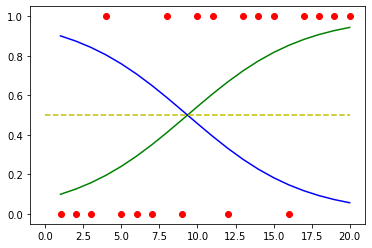

In [23]:
plt.plot(df['x'], df['y'], 'ro')
plt.plot(df['x'], df['proba1'], 'g-')
plt.plot(df['x'], df['proba0'], 'b-')
plt.plot([0, 20], [0.5, 0.5], 'y--')

In [25]:
df['proba1_LOG'] = model.predict_proba(df[['x']])[:, 1]
df['proba0_LOG'] = model.predict_proba(df[['x']])[:, 0]
df

,x,y,"y""",proba1,proba0,proba1_LOG,proba0_LOG
0,1,0,0,0.099368,0.900632,0.099368,0.900632
1,2,0,0,0.125635,0.874365,0.125635,0.874365
2,3,0,0,0.157630,0.842370,0.157630,0.842370
3,4,1,0,0.195947,0.804053,0.195947,0.804053
4,5,0,0,0.240915,0.759085,0.240915,0.759085
5,6,0,0,0.292449,0.707551,0.292449,0.707551
6,7,0,0,0.349925,0.650075,0.349925,0.650075
7,8,1,0,0.412118,0.587882,0.412118,0.587882
8,9,0,0,0.477249,0.522751,0.477249,0.522751
9,10,1,1,0.543164,0.456836,0.543164,0.456836


In [26]:
# predict y threshold 0.8
df['y"t0.8'] = df['proba1'].apply(lambda x: 1 if (x > 0.8) else 0)
df

,x,y,"y""",proba1,proba0,proba1_LOG,proba0_LOG,"y""t0.8"
0,1,0,0,0.099368,0.900632,0.099368,0.900632,0
1,2,0,0,0.125635,0.874365,0.125635,0.874365,0
2,3,0,0,0.157630,0.842370,0.157630,0.842370,0
3,4,1,0,0.195947,0.804053,0.195947,0.804053,0
4,5,0,0,0.240915,0.759085,0.240915,0.759085,0
5,6,0,0,0.292449,0.707551,0.292449,0.707551,0
6,7,0,0,0.349925,0.650075,0.349925,0.650075,0
7,8,1,0,0.412118,0.587882,0.412118,0.587882,0
8,9,0,0,0.477249,0.522751,0.477249,0.522751,0
9,10,1,1,0.543164,0.456836,0.543164,0.456836,0


In [27]:
from sklearn.datasets import load_digits
dataDigit = load_digits()

C:\Users\Adyan\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [28]:
dir(dataDigit)

['DESCR', 'data', 'images', 'target', 'target_names']

8


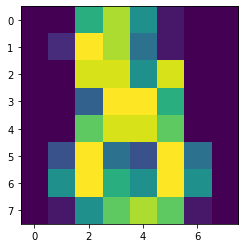

In [37]:
print(dataDigit['target'][-1])
plt.imshow(dataDigit['images'][-1])

In [39]:
df = pd.DataFrame(dataDigit['data'])
df['target'] = dataDigit['target']
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [40]:
from sklearn.model_selection import train_test_split

In [45]:
xtr, xts, ytr, yts = train_test_split(
    df.drop(['target'], axis=1), df['target'],
    test_size = .1
)
xts

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
725,0.0,0.0,3.0,11.0,7.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,4.0,15.0,15.0,4.0,0.0,0.0
569,0.0,0.0,0.0,6.0,14.0,4.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,5.0,10.0,15.0,13.0,0.0
743,0.0,0.0,0.0,12.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0
899,0.0,0.0,6.0,14.0,16.0,5.0,0.0,0.0,0.0,2.0,...,3.0,0.0,0.0,0.0,3.0,14.0,16.0,6.0,0.0,0.0
1098,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,14.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.0,0.0,3.0,10.0,14.0,3.0,0.0,0.0,0.0,8.0,...,12.0,0.0,0.0,0.0,2.0,11.0,16.0,16.0,9.0,0.0
937,0.0,1.0,10.0,12.0,12.0,11.0,0.0,0.0,0.0,7.0,...,12.0,0.0,0.0,0.0,10.0,16.0,16.0,14.0,4.0,0.0
1670,0.0,1.0,6.0,12.0,15.0,5.0,0.0,0.0,0.0,7.0,...,7.0,0.0,0.0,0.0,6.0,16.0,14.0,8.0,0.0,0.0
1187,0.0,0.0,9.0,14.0,15.0,6.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,6.0,14.0,5.0,0.0,0.0,0.0


In [46]:
model = LogisticRegression(
    solver='liblinear',
    multi_class='auto'
)
model.fit(xtr, ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0.5, 1.0, 'Aktual = 5 | Prediksi = 9')

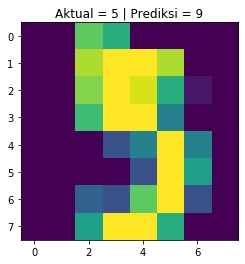

In [55]:
# plt.imshow()
plt.imshow(np.array(xts.iloc[120].tolist()).reshape(8,8))
plt.title(f'Aktual = {yts.iloc[120]} | Prediksi = {model.predict([xts.iloc[120]])[0]}')

In [56]:
# akurasi
model.score(xts, yts)

0.95

In [57]:
from sklearn.datasets import fetch_olivetti_faces

In [59]:
dataOF = fetch_olivetti_faces()
dir(dataOF)

['DESCR', 'data', 'images', 'target']

In [70]:
print(len(dataOF['images'][0][0]))
# total data 400
# @data: [4096]
# @images: [64 x 64]
dataOF['target']

64


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

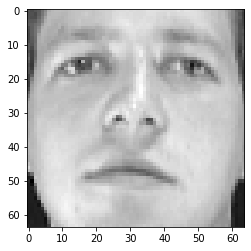

In [80]:
plt.imshow(dataOF['images'][6], cmap='gray')

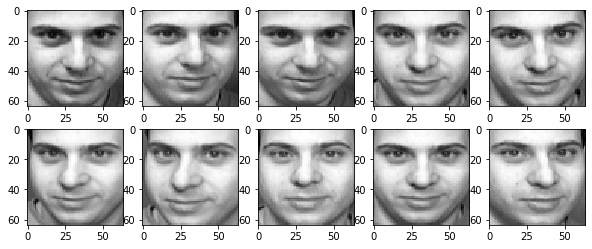

In [88]:
plt.figure(figsize=[10,4])
for i in range(10):
    orangke = 9
    plt.subplot(2, 5, i+1)
    plt.imshow(dataOF['images'][i + (10 * (orangke - 1))], cmap='gray')

In [90]:
df = pd.DataFrame(dataOF['data'])
df['target'] = dataOF['target']
df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364,39
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587,39
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669421,0.673554,0.702479,...,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083,39
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306,39


In [92]:
xtr, xts, ytr, yts = train_test_split(
    df.drop(['target'], axis=1), df['target'],
    test_size = .1
)
xtr

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
23,0.198347,0.177686,0.181818,0.181818,0.190083,0.280992,0.512397,0.661157,0.735537,0.764463,...,0.351240,0.367769,0.371901,0.371901,0.388430,0.396694,0.392562,0.409091,0.396694,0.413223
227,0.743802,0.756198,0.764463,0.772727,0.780992,0.785124,0.797521,0.801653,0.801653,0.814050,...,0.305785,0.342975,0.334711,0.347107,0.342975,0.355372,0.359504,0.367769,0.359504,0.376033
267,0.454545,0.528926,0.644628,0.747934,0.780992,0.780992,0.801653,0.822314,0.826446,0.830579,...,0.061983,0.074380,0.070248,0.086777,0.066116,0.078512,0.090909,0.111570,0.148760,0.169421
383,0.148760,0.157025,0.190083,0.256198,0.338843,0.404959,0.442149,0.475207,0.487603,0.487603,...,0.297521,0.276859,0.297521,0.272727,0.243802,0.227273,0.223140,0.223140,0.231405,0.243802
41,0.677686,0.677686,0.681818,0.706612,0.731405,0.739669,0.756198,0.764463,0.768595,0.760331,...,0.363636,0.367769,0.363636,0.376033,0.297521,0.185950,0.276859,0.235537,0.231405,0.219008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0.500000,0.537190,0.528926,0.524793,0.553719,0.607438,0.640496,0.652893,0.661157,0.685950,...,0.322314,0.264463,0.260331,0.334711,0.421488,0.342975,0.479339,0.520661,0.599174,0.384298
151,0.487603,0.557851,0.574380,0.566116,0.561983,0.595041,0.623967,0.628099,0.644628,0.673554,...,0.446281,0.528926,0.619835,0.669421,0.685950,0.665289,0.417355,0.177686,0.190083,0.202479
86,0.347107,0.347107,0.161157,0.041322,0.243802,0.458678,0.512397,0.566116,0.615702,0.611570,...,0.367769,0.404959,0.433884,0.421488,0.438017,0.475207,0.483471,0.500000,0.462810,0.450413
129,0.454545,0.504132,0.504132,0.504132,0.545455,0.590909,0.619835,0.628099,0.669421,0.669421,...,0.404959,0.376033,0.326446,0.301653,0.260331,0.285124,0.380165,0.388430,0.380165,0.479339


In [93]:
model = LogisticRegression(
    solver='liblinear',
    multi_class='auto'
)
model.fit(xtr, ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0.5, 1.0, 'Aktual = 17 | Prediksi = 17')

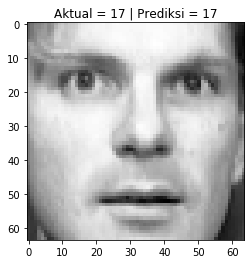

In [112]:
# plt.imshow()
mukake = 6
plt.imshow(np.array(xts.iloc[mukake].tolist()).reshape(-1,64), cmap='gray')
plt.title(f'Aktual = {yts.iloc[mukake]} | Prediksi = {model.predict([xts.iloc[mukake]])[0]}')

In [96]:
model.score(xts, yts)

0.95

In [113]:
from sklearn.datasets import fetch_lfw_people
# Labeled Faces in the Wild

In [114]:
dataLfw = fetch_lfw_people()
dir(dataLfw)

['DESCR', 'data', 'images', 'target', 'target_names']

Text(0.5, 1.0, 'Mahmoud Abbas')

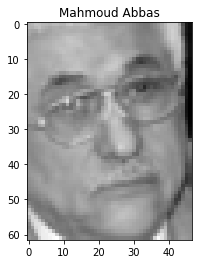

In [143]:
plt.imshow(dataLfw['images'][1], cmap='gray')
plt.title(dataLfw['target_names'][dataLfw['target'][1]])